## **Ariplane (Classification)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

## import data from 
https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

In [2]:
df=pd.read_csv('Air.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Data Preprocessing

In [3]:
df.shape

(25976, 25)

In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [5]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

## update the null value

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.iloc[:,-2:-1])
df.iloc[:,-2:-1] = imp.transform(df.iloc[:,-2:-1])

In [8]:
df["Arrival Delay in Minutes"].isnull().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

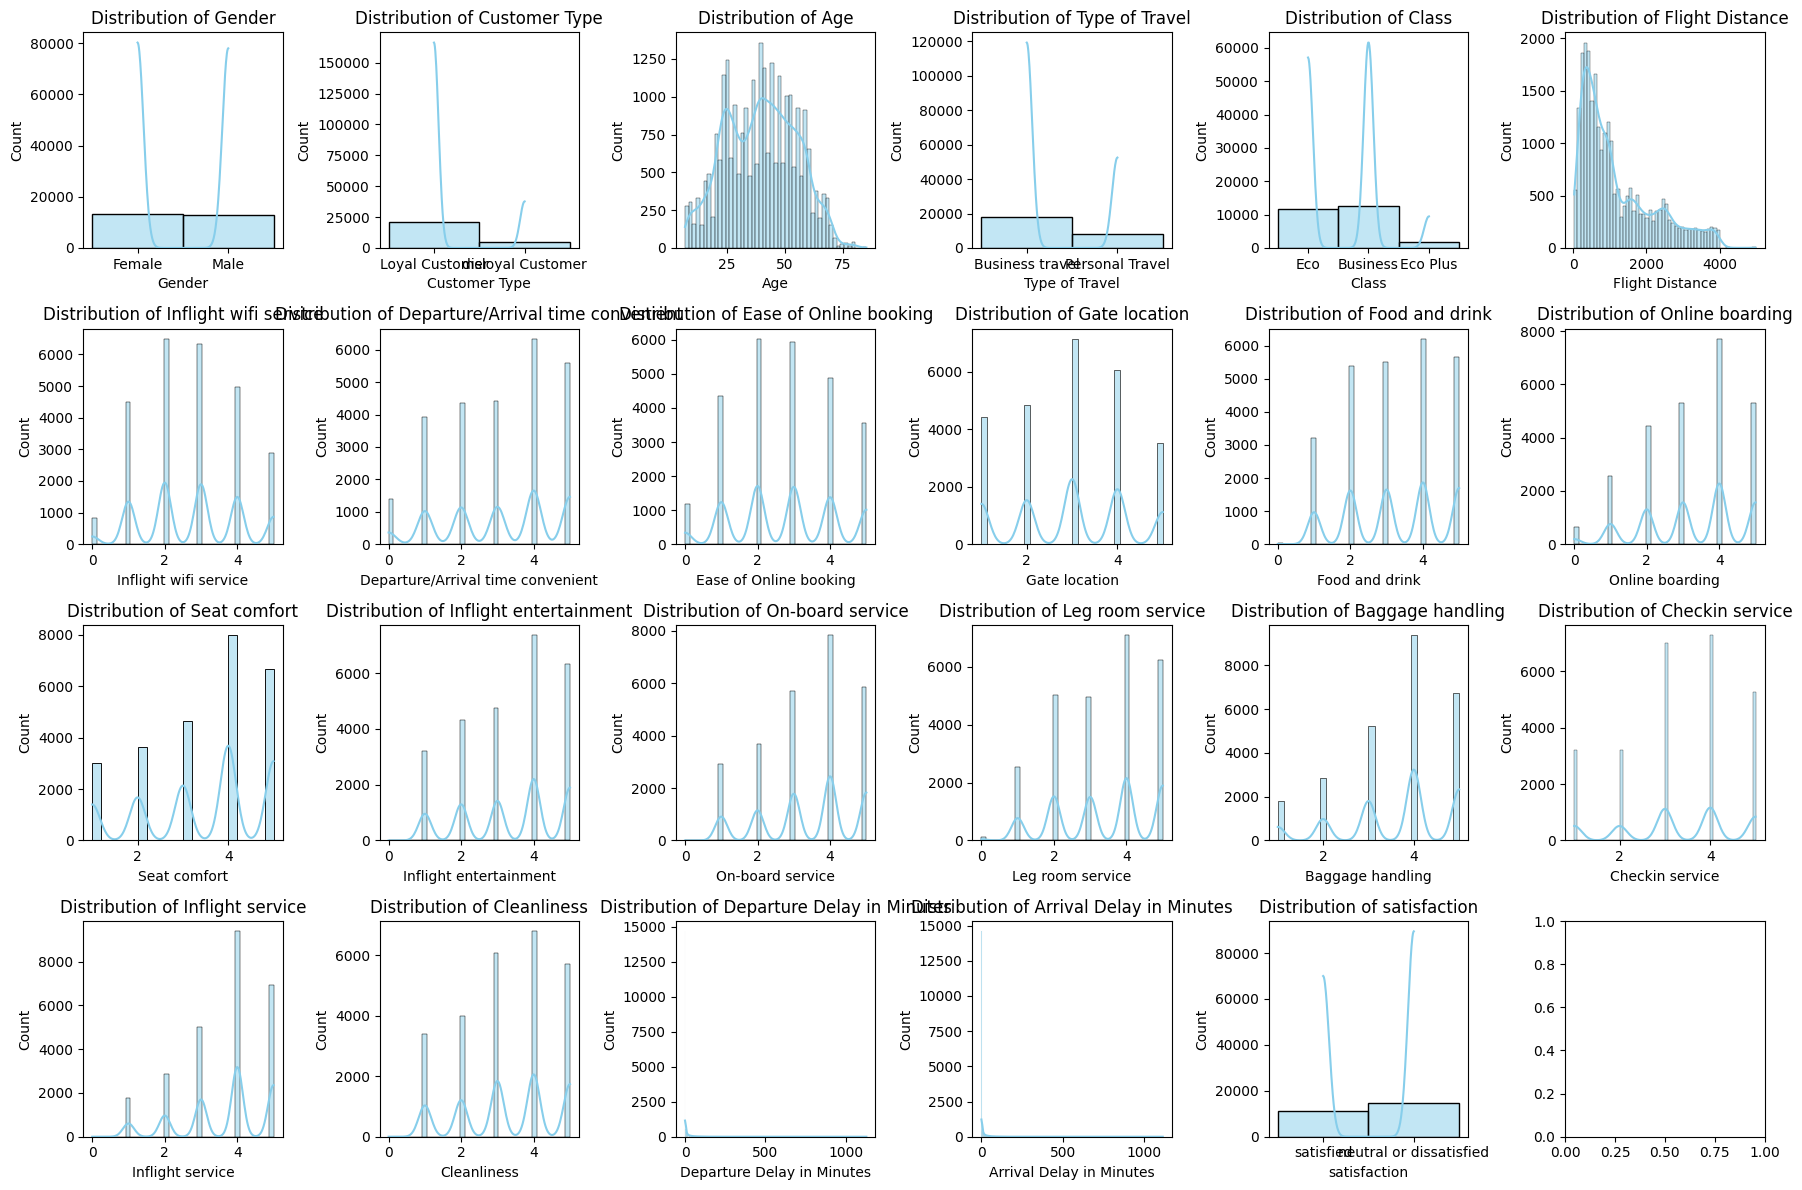

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 12))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i // 6, i % 6])
    axes[i // 6, i % 6].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Encoding

In [12]:
print(df['satisfaction'].unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())

['satisfied' 'neutral or dissatisfied']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']


In [13]:
x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), ['Gender', 'Type of Travel', 'Class', 'Customer Type'])], remainder='passthrough')
x_transformed = ct.fit_transform(x)

new_columns = ct.get_feature_names_out()  
x_transformed = pd.DataFrame(x_transformed, columns=new_columns)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

x_transformed.head()


,encoder__Gender_Female,encoder__Gender_Male,encoder__Type of Travel_Business travel,encoder__Type of Travel_Personal Travel,encoder__Class_Business,encoder__Class_Eco,encoder__Class_Eco Plus,encoder__Customer Type_Loyal Customer,encoder__Customer Type_disloyal Customer,remainder__Age,...,remainder__Seat comfort,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,52.0,...,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,...,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,20.0,...,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,44.0,...,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,49.0,...,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0


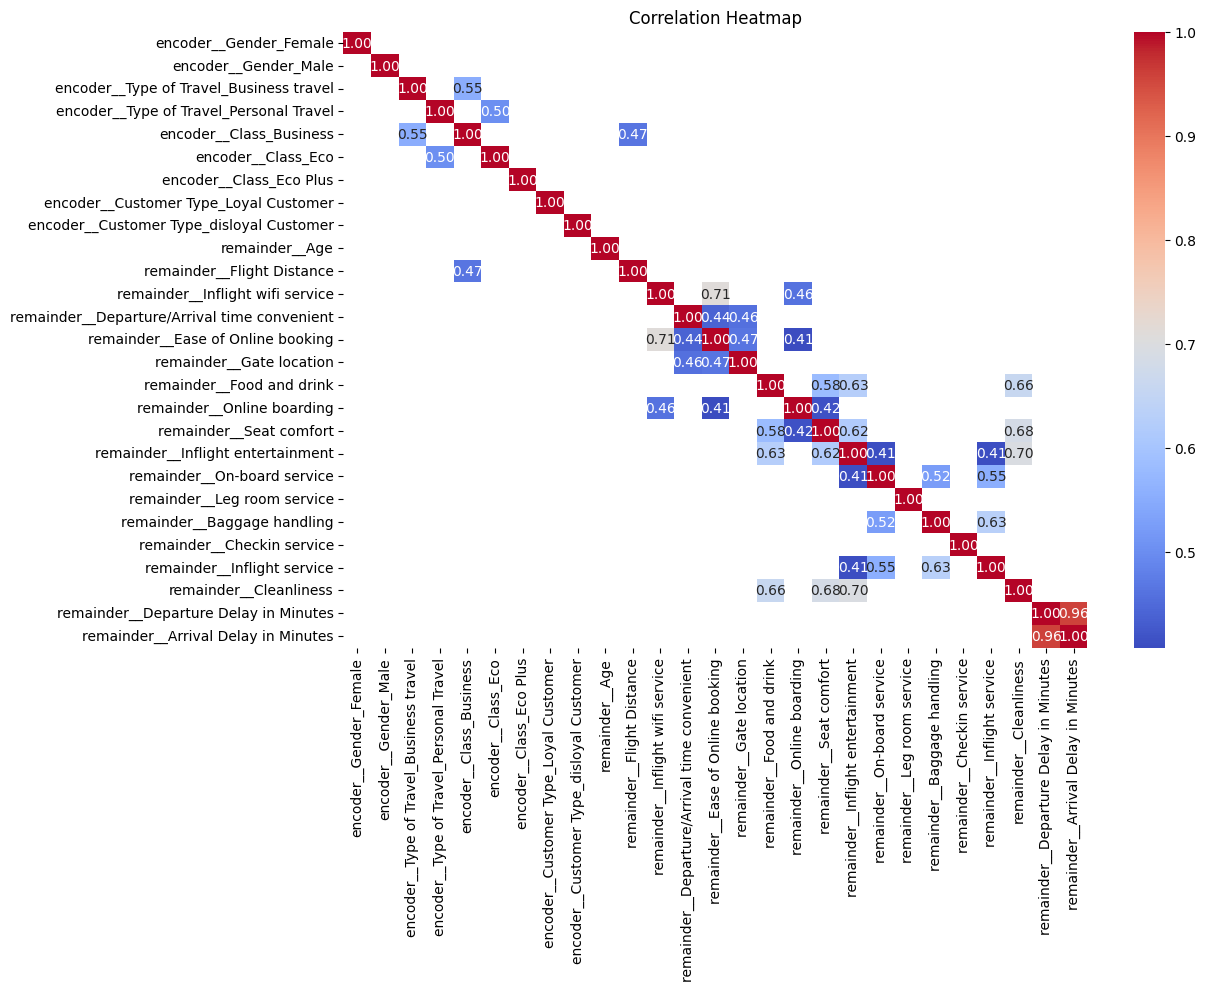

In [14]:
corr_data = x_transformed.corr()
plt.figure(figsize=(12,8 ))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f',mask=corr_data<.4)
plt.title('Correlation Heatmap')
plt.show()

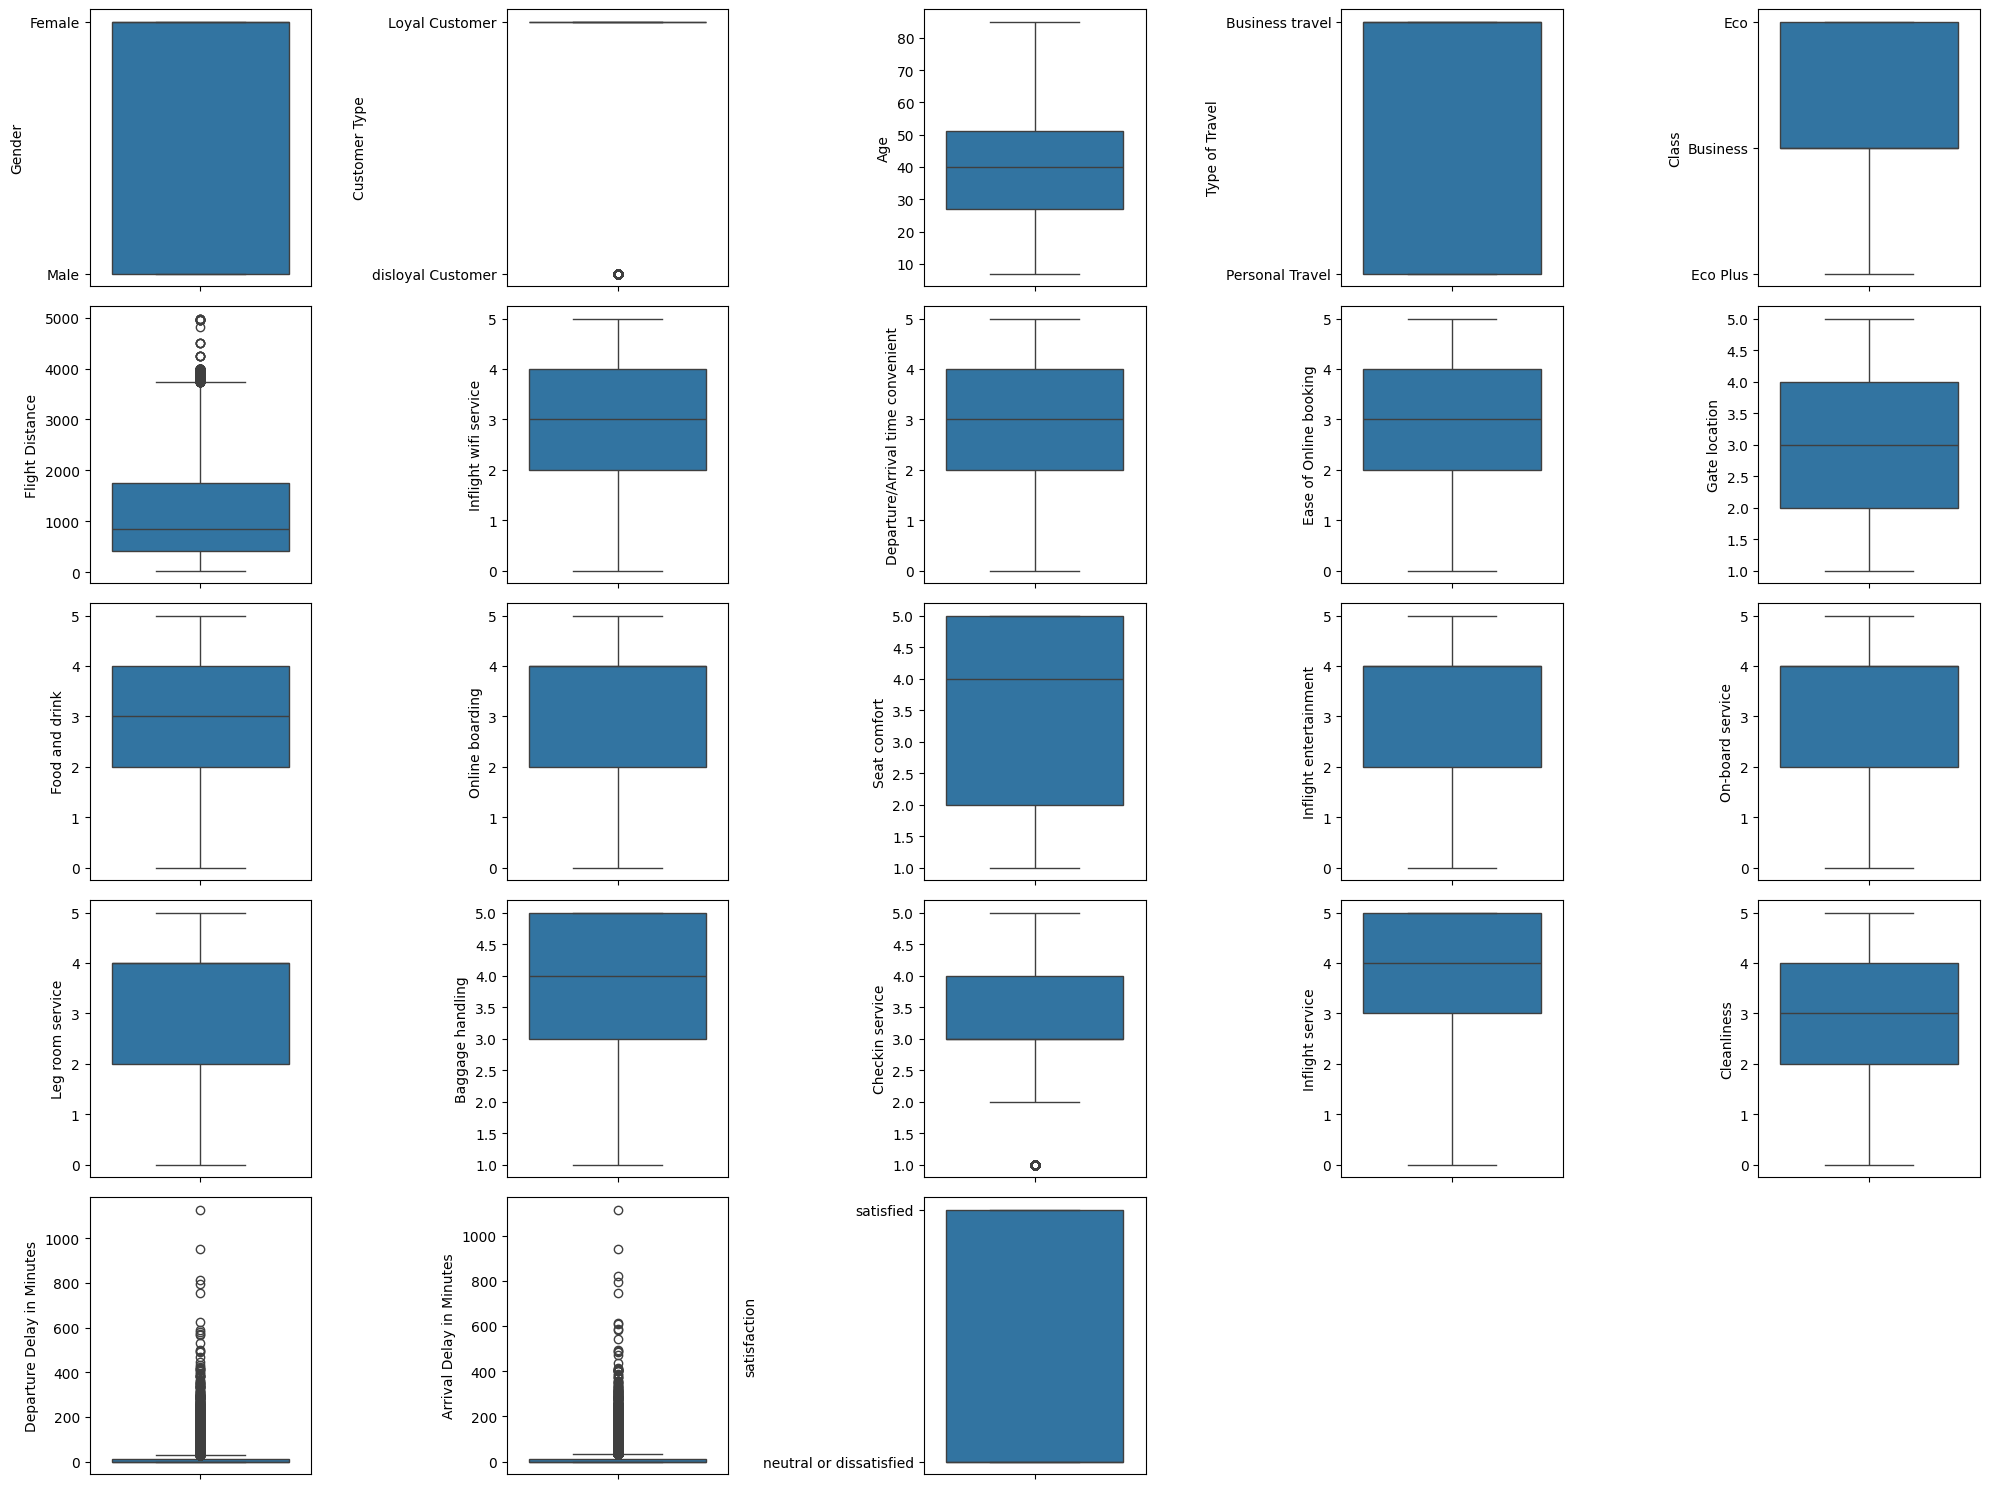

In [15]:
z = 1
plt.figure(figsize=(20, 15))
for col in df:
    plt.subplot(5,5, z)
    sns.boxplot(df[col])
    z += 1

plt.tight_layout()  
plt.show()


In [16]:
df = x_transformed
df['satisfaction']=y_encoded
df.head()

,encoder__Gender_Female,encoder__Gender_Male,encoder__Type of Travel_Business travel,encoder__Type of Travel_Personal Travel,encoder__Class_Business,encoder__Class_Eco,encoder__Class_Eco Plus,encoder__Customer Type_Loyal Customer,encoder__Customer Type_disloyal Customer,remainder__Age,...,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes,satisfaction
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,52.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,1
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,1
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,20.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,44.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,1
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,49.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,1


In [17]:
df.columns

Index(['encoder__Gender_Female', 'encoder__Gender_Male',
       'encoder__Type of Travel_Business travel',
       'encoder__Type of Travel_Personal Travel', 'encoder__Class_Business',
       'encoder__Class_Eco', 'encoder__Class_Eco Plus',
       'encoder__Customer Type_Loyal Customer',
       'encoder__Customer Type_disloyal Customer', 'remainder__Age',
       'remainder__Flight Distance', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness',
       'remainder__Departure Delay in Minutes',
       'remainder__Arrival Delay in Minutes', 'satisfacti

In [18]:
abs(df.corr()["satisfaction"]).sort_values(ascending=False)

satisfaction                                    1.000000
encoder__Class_Business                         0.496974
remainder__Online boarding                      0.494526
encoder__Type of Travel_Business travel         0.453268
encoder__Type of Travel_Personal Travel         0.453268
encoder__Class_Eco                              0.442417
remainder__Inflight entertainment               0.398951
remainder__Seat comfort                         0.346275
remainder__On-board service                     0.321491
remainder__Cleanliness                          0.314350
remainder__Leg room service                     0.309629
remainder__Flight Distance                      0.295292
remainder__Inflight wifi service                0.280395
remainder__Baggage handling                     0.252415
remainder__Inflight service                     0.245573
remainder__Checkin service                      0.241495
remainder__Food and drink                       0.216868
encoder__Customer Type_disloyal

In [19]:
df.drop(['encoder__Gender_Male','remainder__Gate location','remainder__Arrival Delay in Minutes',"remainder__Departure Delay in Minutes","encoder__Gender_Female","remainder__Departure/Arrival time convenient"
         ],axis=1,inplace=True)
df.head()

,encoder__Type of Travel_Business travel,encoder__Type of Travel_Personal Travel,encoder__Class_Business,encoder__Class_Eco,encoder__Class_Eco Plus,encoder__Customer Type_Loyal Customer,encoder__Customer Type_disloyal Customer,remainder__Age,remainder__Flight Distance,remainder__Inflight wifi service,...,remainder__Online boarding,remainder__Seat comfort,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,satisfaction
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,52.0,160.0,5.0,...,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,1
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,2863.0,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,1
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,20.0,192.0,2.0,...,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,44.0,3377.0,0.0,...,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,49.0,1182.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,1


## Visualization

In [20]:
df.shape

(25976, 22)

## Check Unbalance

In [21]:
class_zeros_count,class_ones_count=df.satisfaction.value_counts()

<Axes: xlabel='satisfaction', ylabel='count'>

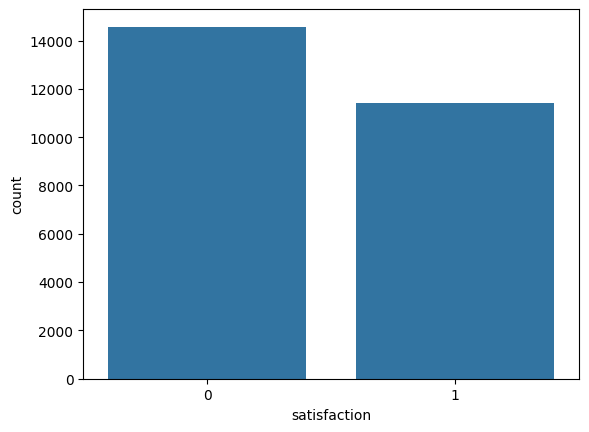

In [22]:
sns.countplot(x='satisfaction',data=df)

# Handle Unbalance

In [23]:
class_ones=df[df['satisfaction']==1]
class_zeros=df[df['satisfaction']==0]

In [24]:
from sklearn.utils import resample
##(under-sampling
df_class = resample(class_zeros ,replace= True,n_samples=class_ones_count,random_state=42)
df=pd.concat([df_class,class_ones])

In [25]:
class_zeros.shape

(14573, 22)

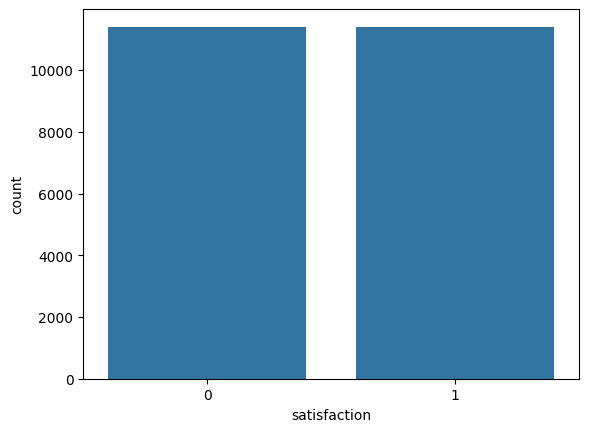

In [26]:
sns.countplot(x='satisfaction',data=df)
plt.show()

# Train & test your models.

In [27]:
x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

# Logistic Model

In [30]:
log_model=LogisticRegression()

params={
    'solver':['liblinear','sag','saga'],
    'max_iter':[1000, 5000, 10000],
     'C':[0.1,1,10]
}

grid=GridSearchCV(
    estimator=log_model,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [1000, 5000, 10000],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [31]:
grid.best_params_

{'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}

In [32]:
final_model_log=grid.best_estimator_
final_model_log

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

# Predict the output of new values

In [33]:
y_pred=final_model_log.predict(x_test_sc)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

# EVALUATION

In [34]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
accuracy

0.8667251205611574

In [35]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[2010,  289],
       [ 319, 1944]], dtype=int64)

In [36]:
model_1_evalutate = {"accuracy" : accuracy}

# visualizes the dataset after performing the model

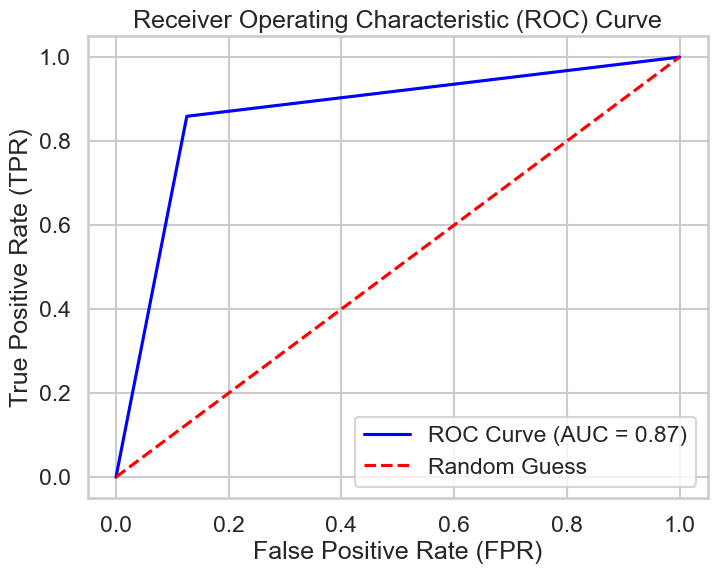

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
sns.set(style="whitegrid", context="talk")
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], label='Random Guess', color='red', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [38]:
print(accuracy_score(y_test,y_pred))
log_acc=accuracy_score(y_test,y_pred)


0.8667251205611574


<Axes: >

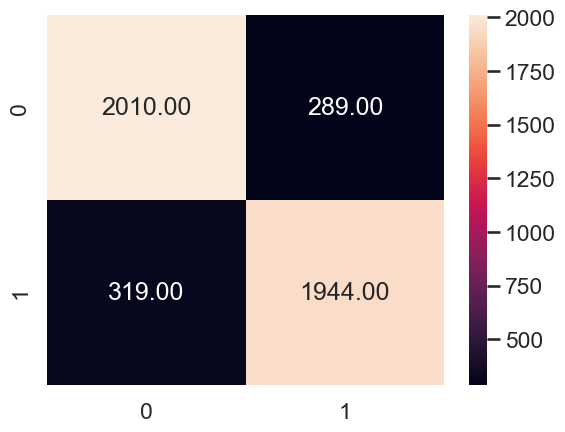

In [39]:
sns.heatmap(cof,annot=True,fmt=".2f")

# Random Forest Classifier

In [40]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=200,
                       random_state=42)
# Fit the model
rf_model.fit(x_train_sc, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=200,
                       random_state=42)

In [41]:
y_pred=rf_model.predict(x_test_sc)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
accuracy

0.9636124506795265

In [43]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[2232,   67],
       [  99, 2164]], dtype=int64)

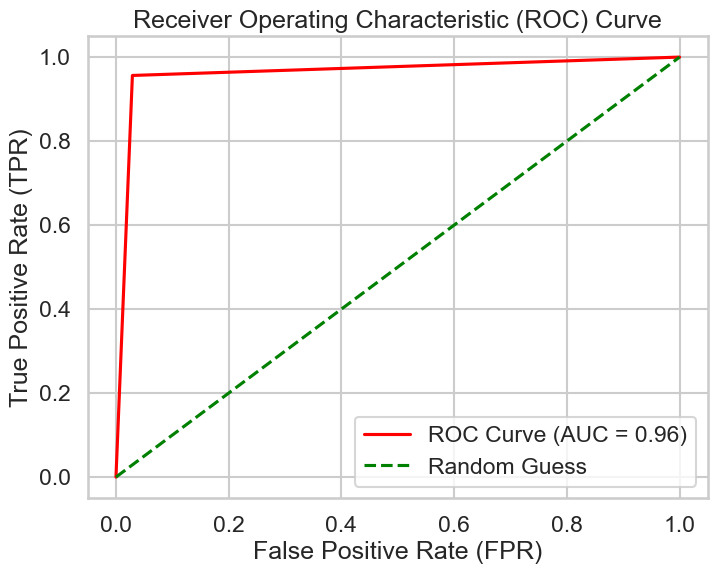

In [44]:
sns.set(style="whitegrid", context="talk")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
sns.lineplot(x=[0, 1], y=[0, 1], label='Random Guess', color='green', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

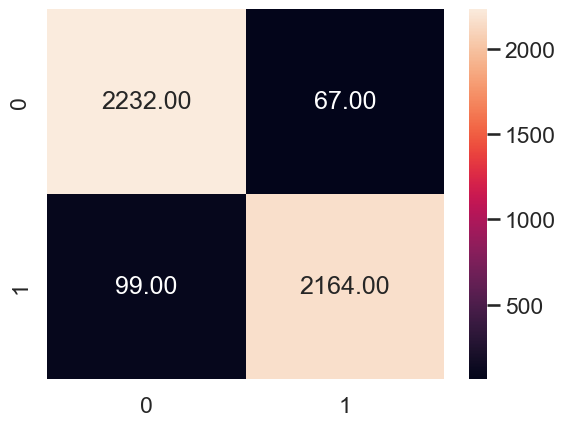

In [45]:
sns.heatmap(cof,annot=True,fmt=".2f")
plt.show()

In [46]:
model_2_evalutate = {"accuracy" : accuracy}

In [47]:
summary_table = pd.DataFrame({
        "Metric": "accuracy",
        "Logistic Model": model_1_evalutate.values(),
        "Random Forest Model":model_2_evalutate.values(),

    })

In [48]:
summary_table

,Metric,Logistic Model,Random Forest Model
0,accuracy,0.866725,0.963612


we found that the random forset model is perfect then the logistic model

# predict vs actual

In [49]:
acc = pd.DataFrame()
acc["actuall"] = y_test
acc["predict"] = y_pred
acc.reset_index(drop=True)

,actuall,predict
0,0,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
4557,0,1
4558,0,0
4559,0,0
4560,0,0
